<a href="https://colab.research.google.com/github/kiannylim/SC1015-Data-Science-Project/blob/main/DataVisualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [24]:
dataBeforeSampling = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

## **Exploratory Analysis** 

### Categorical vs AttritionRate

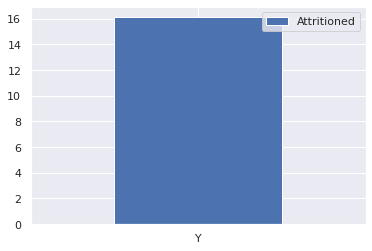

In [25]:
comparing = "Over18"
data = dataBeforeSampling
index = data[comparing].unique()
attritioned = data.loc[(data["Attrition"] == "Yes")]
not_attritioned = data.loc[(data["Attrition"] == "No")]
percentAttrition, percentNotAttrition = [], []

for i in index:
    attritioned_number = len(attritioned[attritioned[comparing] == i])
    not_attritioned_number = len(not_attritioned[not_attritioned[comparing] == i])
    total = attritioned_number + not_attritioned_number
    percentAttrition.append(attritioned_number/total * 100)
    percentNotAttrition.append(not_attritioned_number/total * 100)

newdata = pd.DataFrame({'Attritioned':percentAttrition}, index = index).sort_index()
ax = newdata.plot.bar(rot = 1)

#### Variables that are not that good

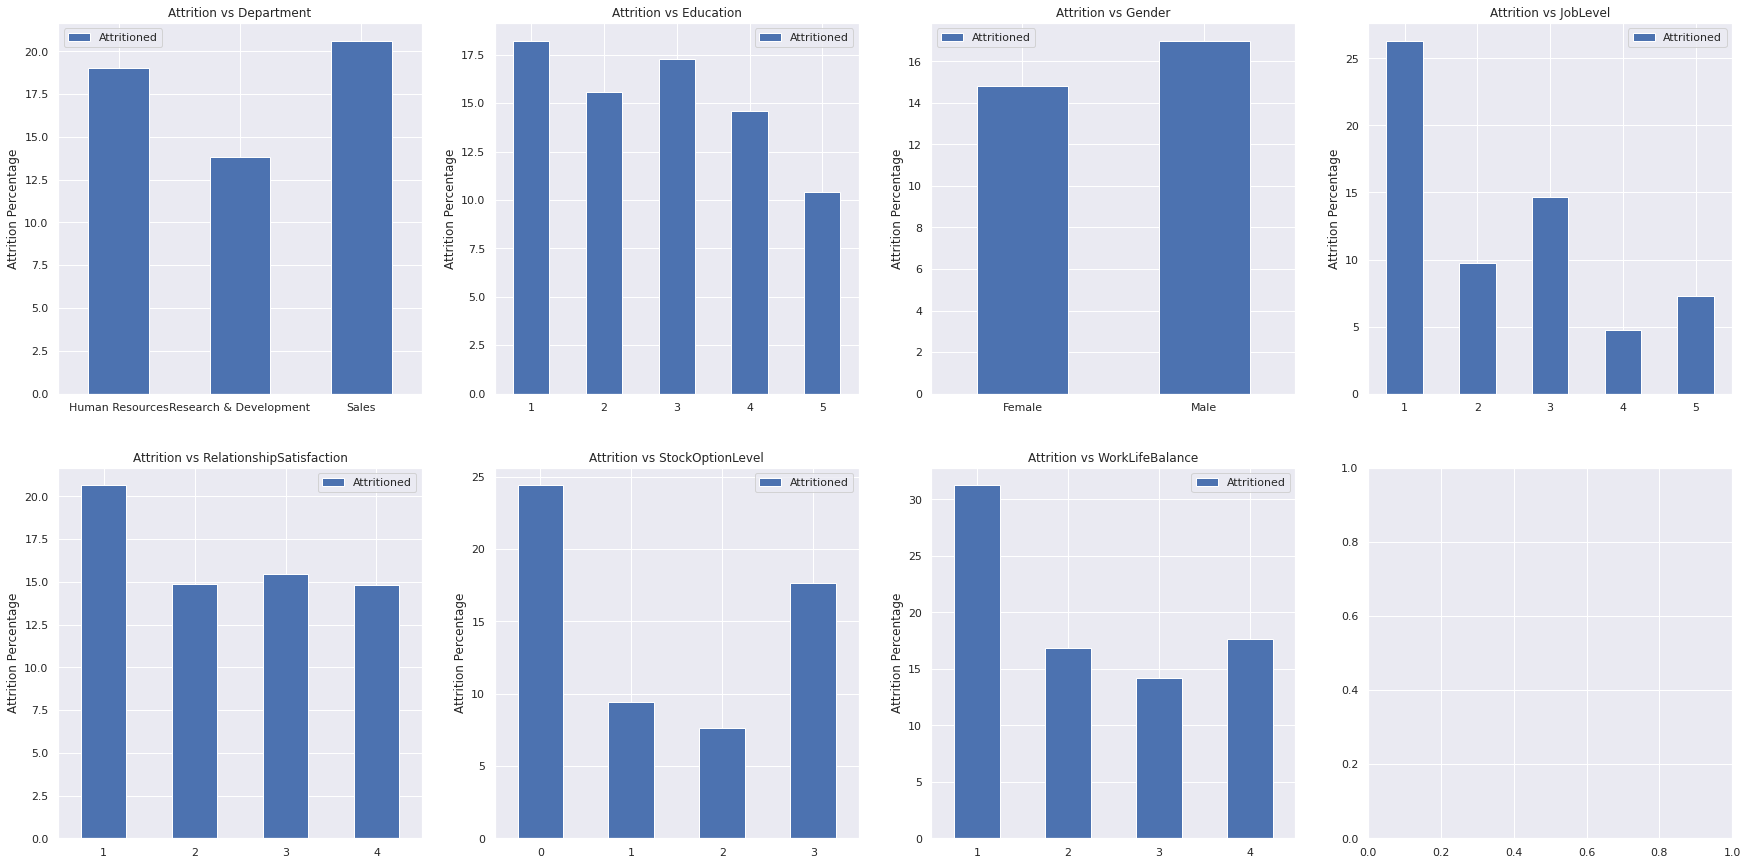

In [35]:
data = dataBeforeSampling
listofvar = ["Department", "Education", "Gender", "JobLevel", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]
f,axes = plt.subplots(2,4,figsize=(30,15))
count = 0

for i in listofvar:
  comparing = i

  index = data[comparing].unique()
  attritioned = data.loc[(data["Attrition"] == "Yes")]
  not_attritioned = data.loc[(data["Attrition"] == "No")]
  percentAttrition, percentNotAttrition = [], []

  for i in index:
      attritioned_number = len(attritioned[attritioned[comparing] == i])
      not_attritioned_number = len(not_attritioned[not_attritioned[comparing] == i])
      total = attritioned_number + not_attritioned_number
      percentAttrition.append(attritioned_number/total * 100)
      percentNotAttrition.append(not_attritioned_number/total * 100)

  newdata = pd.DataFrame({'Attritioned':percentAttrition}, index = index).sort_index()
  if comparing in ["EducationField", "JobRole"]:
    ax = newdata.plot.bar(ax = axes[count//4][count%4])
  else:
    ax = newdata.plot.bar(rot = 0, ax = axes[count//4][count%4])
  ax.set_title("Attrition vs " + comparing)
  ax.set_ylabel("Attrition Percentage")
  count += 1

The other variables are quite ambiguous and does not seem to suggest so. The last 7 categorical variables "BusinessTravel", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "MaritalStatus",  "EducationField", "JobRole" seems to suggest a linear trend with every different categorical value.

#### Better categorical variables

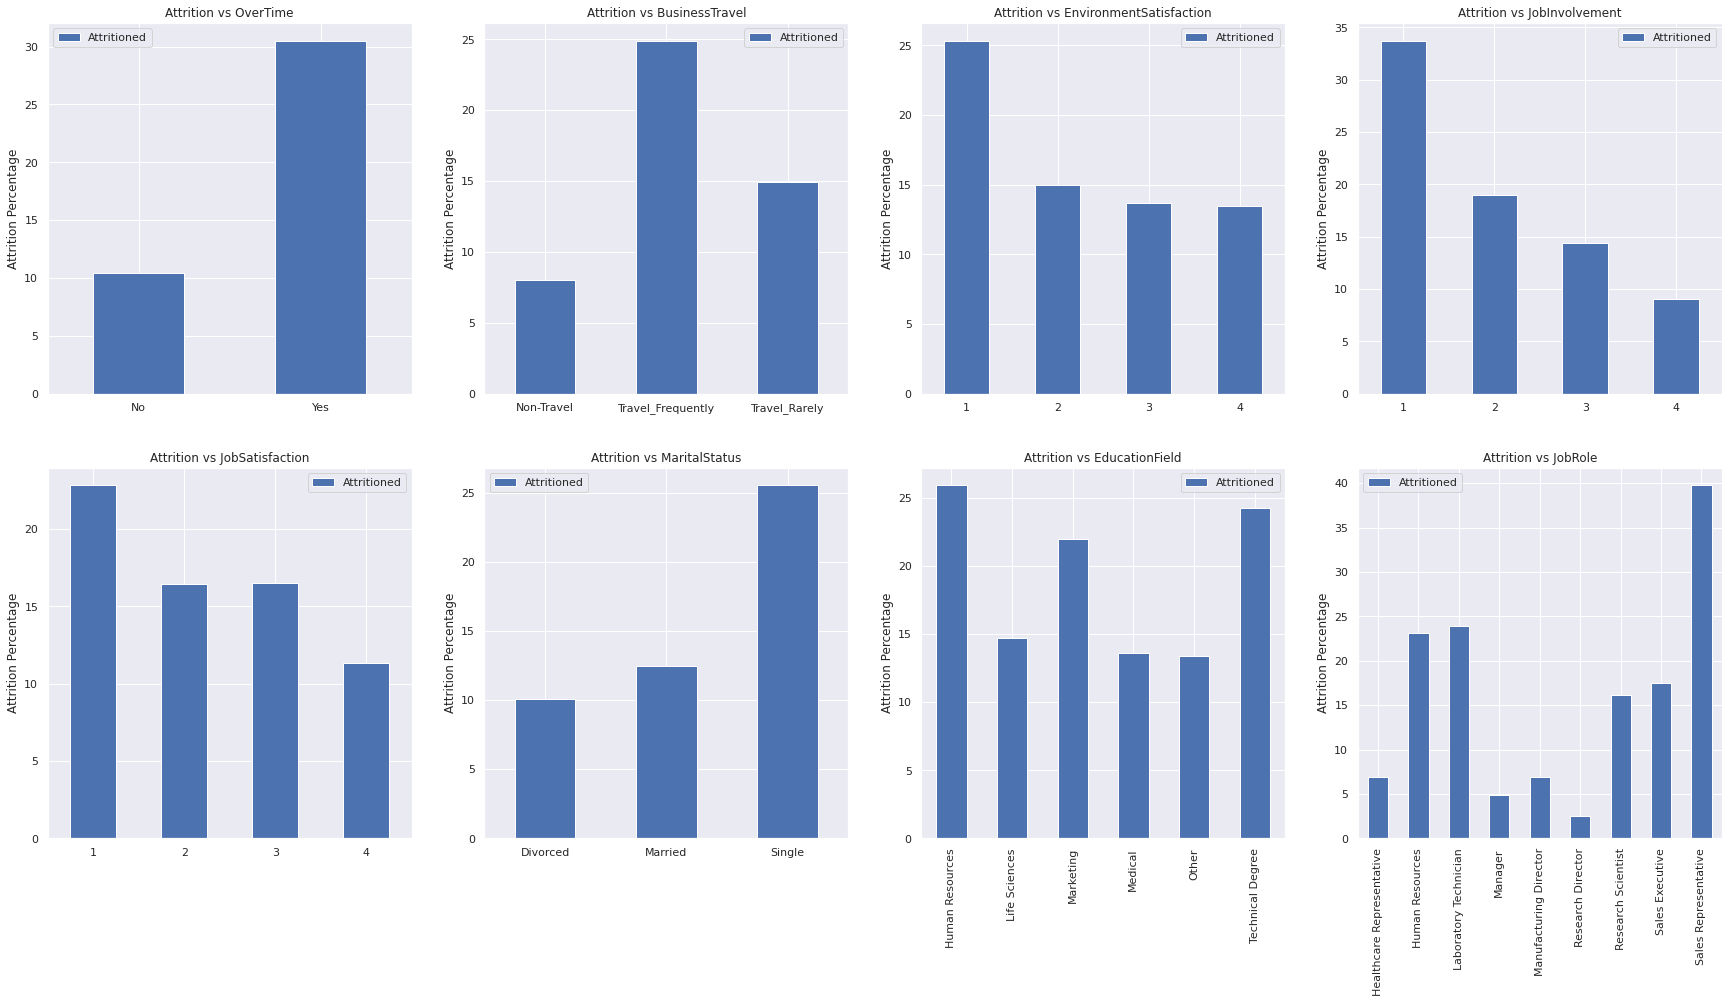

In [33]:
data = dataBeforeSampling
listofvar = ["OverTime","BusinessTravel", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "MaritalStatus",  "EducationField", "JobRole"]
f,axes = plt.subplots(2,4,figsize=(30,15))
count = 0

for i in listofvar:
  comparing = i

  index = data[comparing].unique()
  attritioned = data.loc[(data["Attrition"] == "Yes")]
  not_attritioned = data.loc[(data["Attrition"] == "No")]
  percentAttrition, percentNotAttrition = [], []

  for i in index:
      attritioned_number = len(attritioned[attritioned[comparing] == i])
      not_attritioned_number = len(not_attritioned[not_attritioned[comparing] == i])
      total = attritioned_number + not_attritioned_number
      percentAttrition.append(attritioned_number/total * 100)
      percentNotAttrition.append(not_attritioned_number/total * 100)

  newdata = pd.DataFrame({'Attritioned':percentAttrition}, index = index).sort_index()
  if comparing in ["EducationField", "JobRole"]:
    ax = newdata.plot.bar(ax = axes[count//4][count%4])
  else:
    ax = newdata.plot.bar(rot = 0, ax = axes[count//4][count%4])
  ax.set_title("Attrition vs " + comparing)
  ax.set_ylabel("Attrition Percentage")
  count += 1

### Numeric vs AttritionRate

In [16]:
rslt_df = data.loc[data['Attrition'] == "Yes"]
crucial_data = rslt_df[['EmployeeCount', 'EmployeeNumber', 'StandardHours']]
crucial_data

,EmployeeCount,EmployeeNumber,StandardHours
0,1,1,80
2,1,4,80
14,1,19,80
21,1,27,80
24,1,31,80
...,...,...,...
1438,1,2023,80
1442,1,2027,80
1444,1,2032,80
1452,1,2044,80


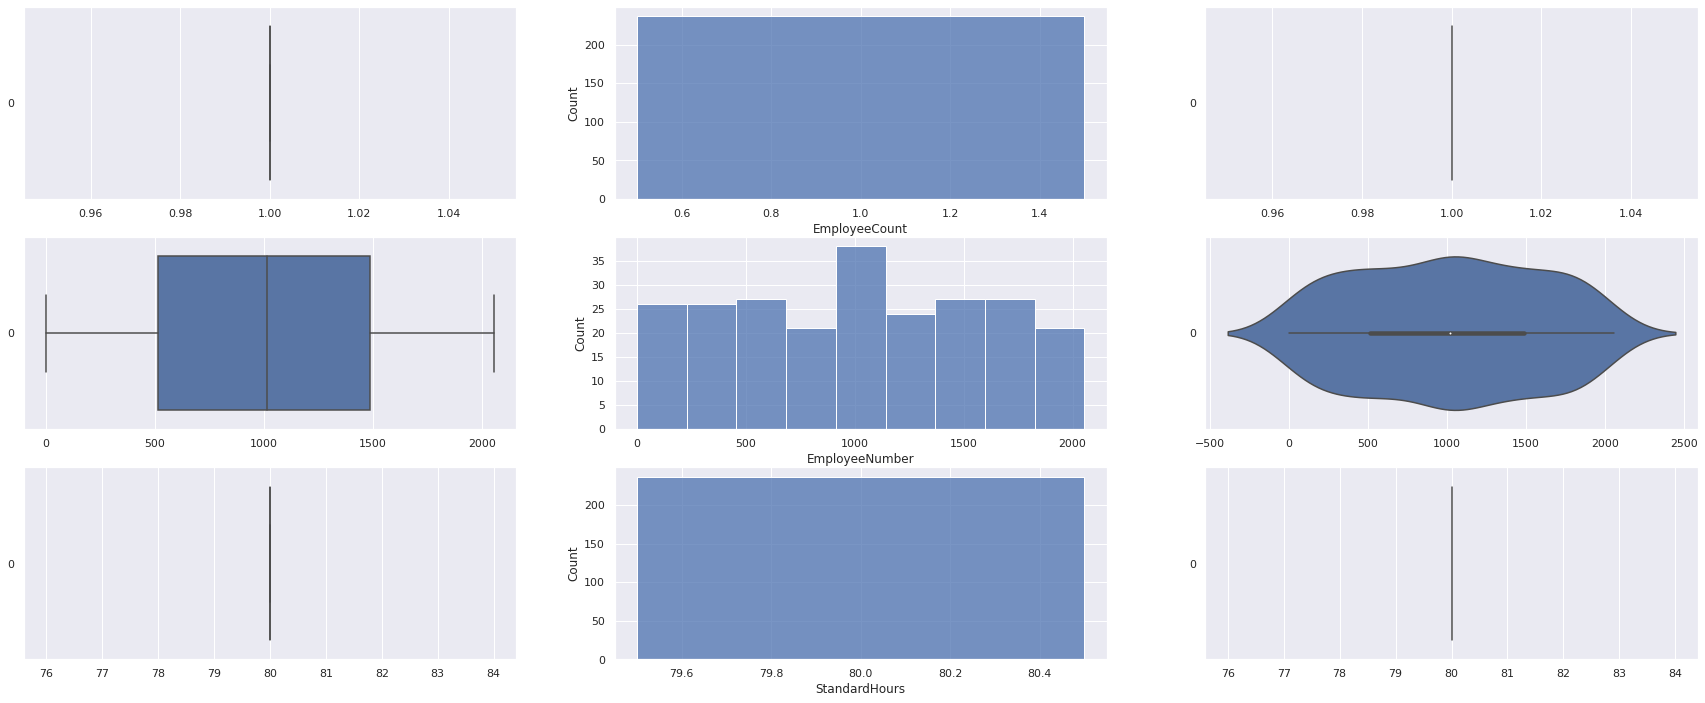

In [18]:
# Draw the distributions of bad variables
f, axes = plt.subplots(3, 3, figsize=(30, 12))

count = 0
for var in crucial_data:
    sb.boxplot(data = crucial_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = crucial_data[var], ax = axes[count,1])
    sb.violinplot(data = crucial_data[var], orient = "h", ax = axes[count,2])
    count += 1

These variables (EmployeeCount, StandardHours) do not have any variance. EmployeeNumber just refers to the index of the employees

#### Somewhat bad Numerical variables

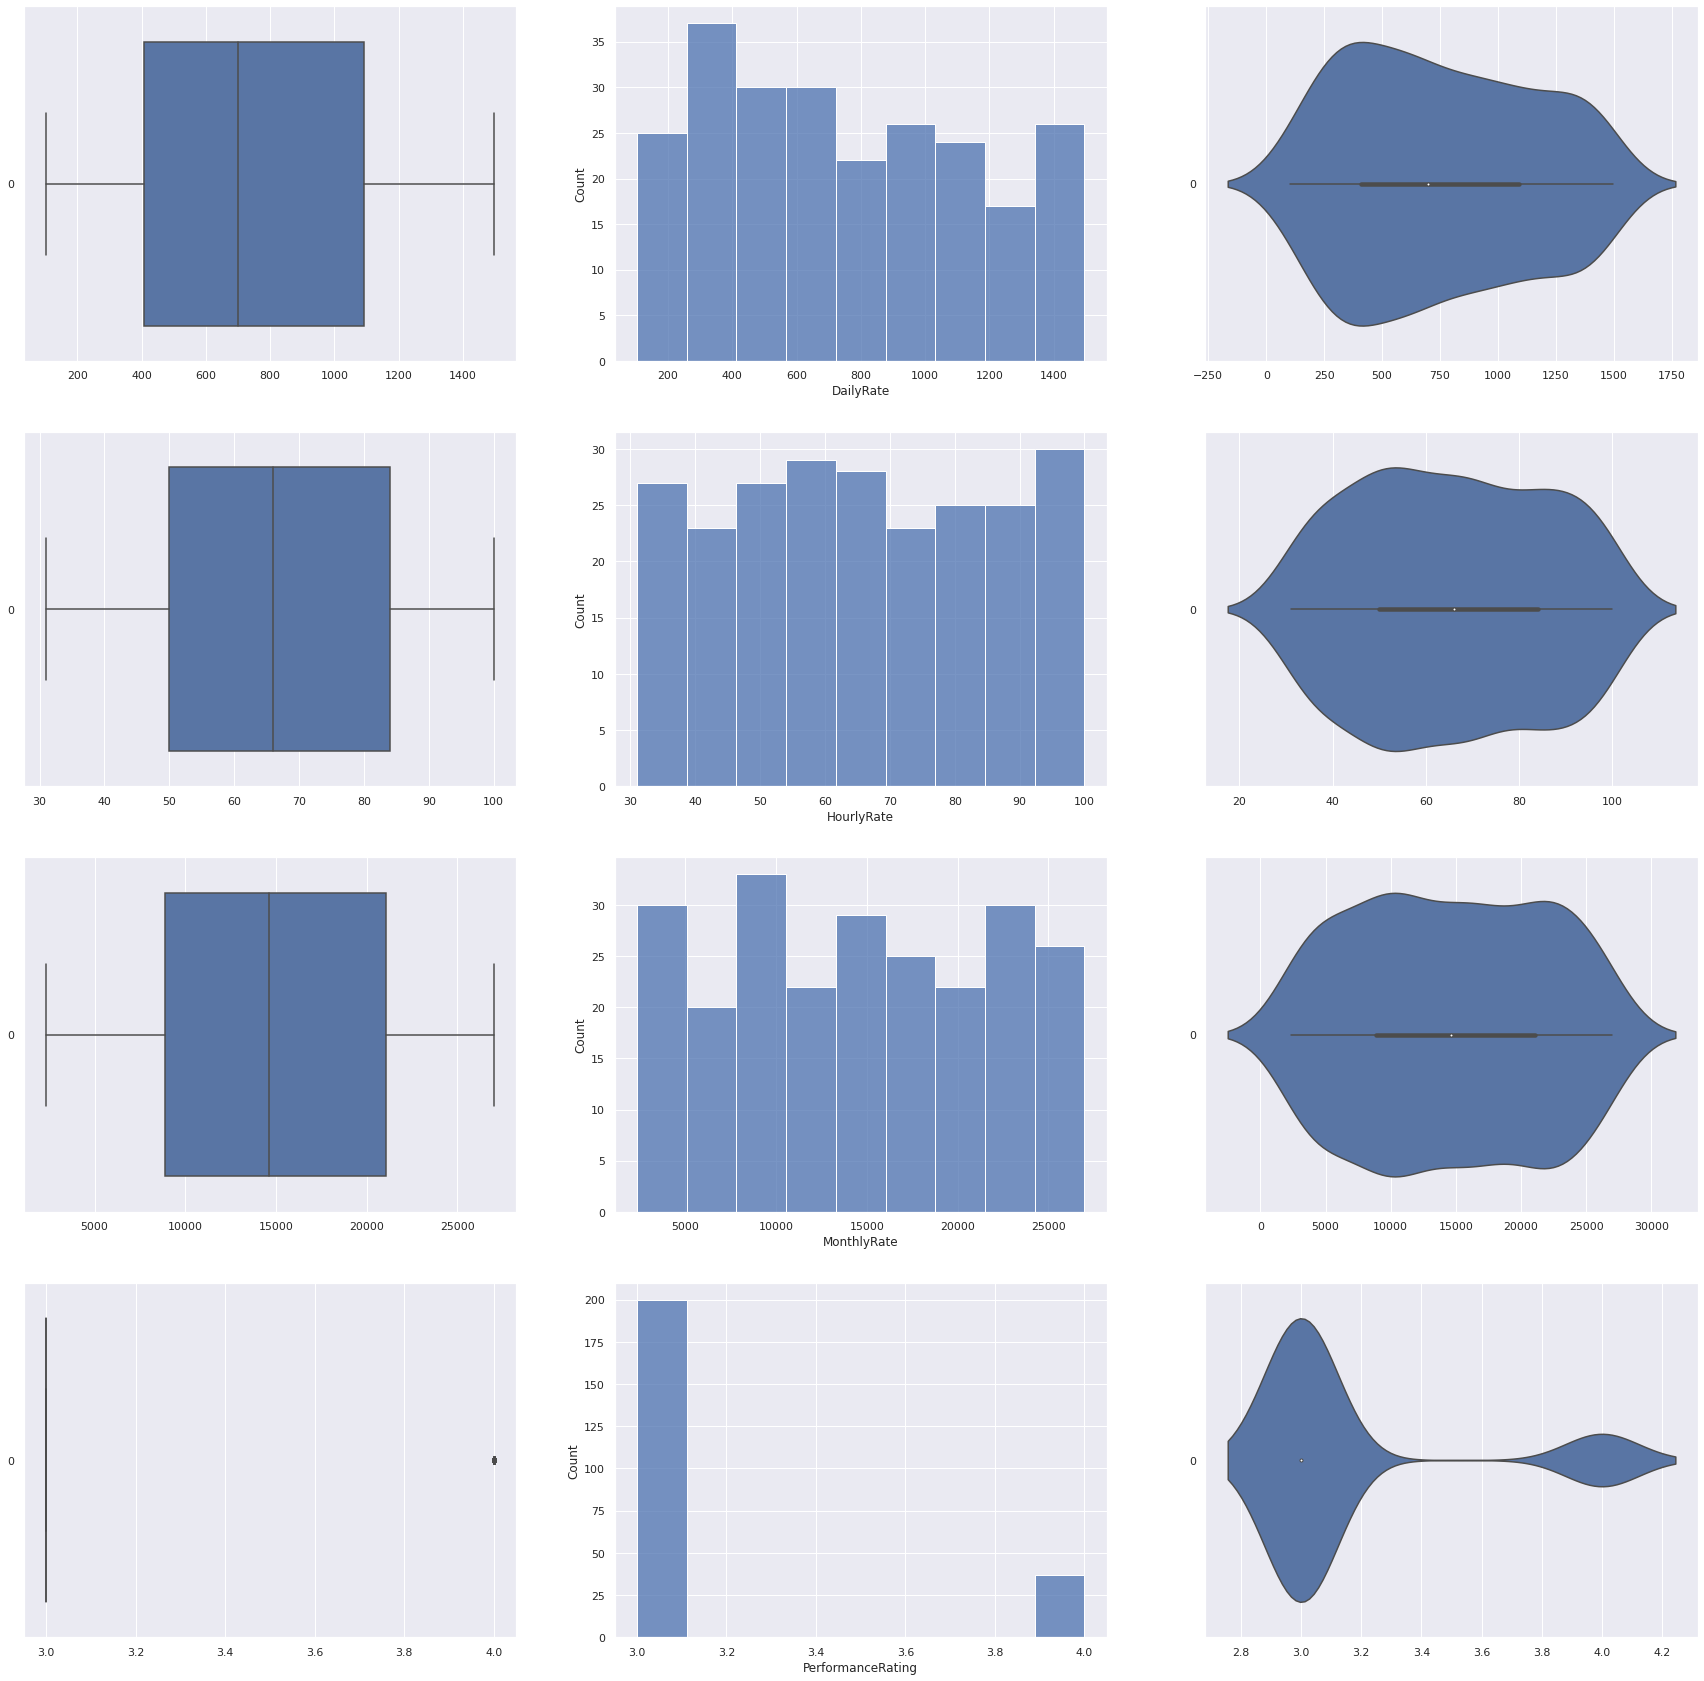

In [42]:
rslt_df = data.loc[data['Attrition'] == "Yes"]
crucial_data = rslt_df[["DailyRate", "HourlyRate", "MonthlyRate", "PerformanceRating"]]

f, axes = plt.subplots(4, 3, figsize=(30, 30))

count = 0
for var in crucial_data:
    sb.boxplot(data = crucial_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = crucial_data[var], ax = axes[count,1])
    sb.violinplot(data = crucial_data[var], orient = "h", ax = axes[count,2])
    count += 1

#### Better Numerical variables

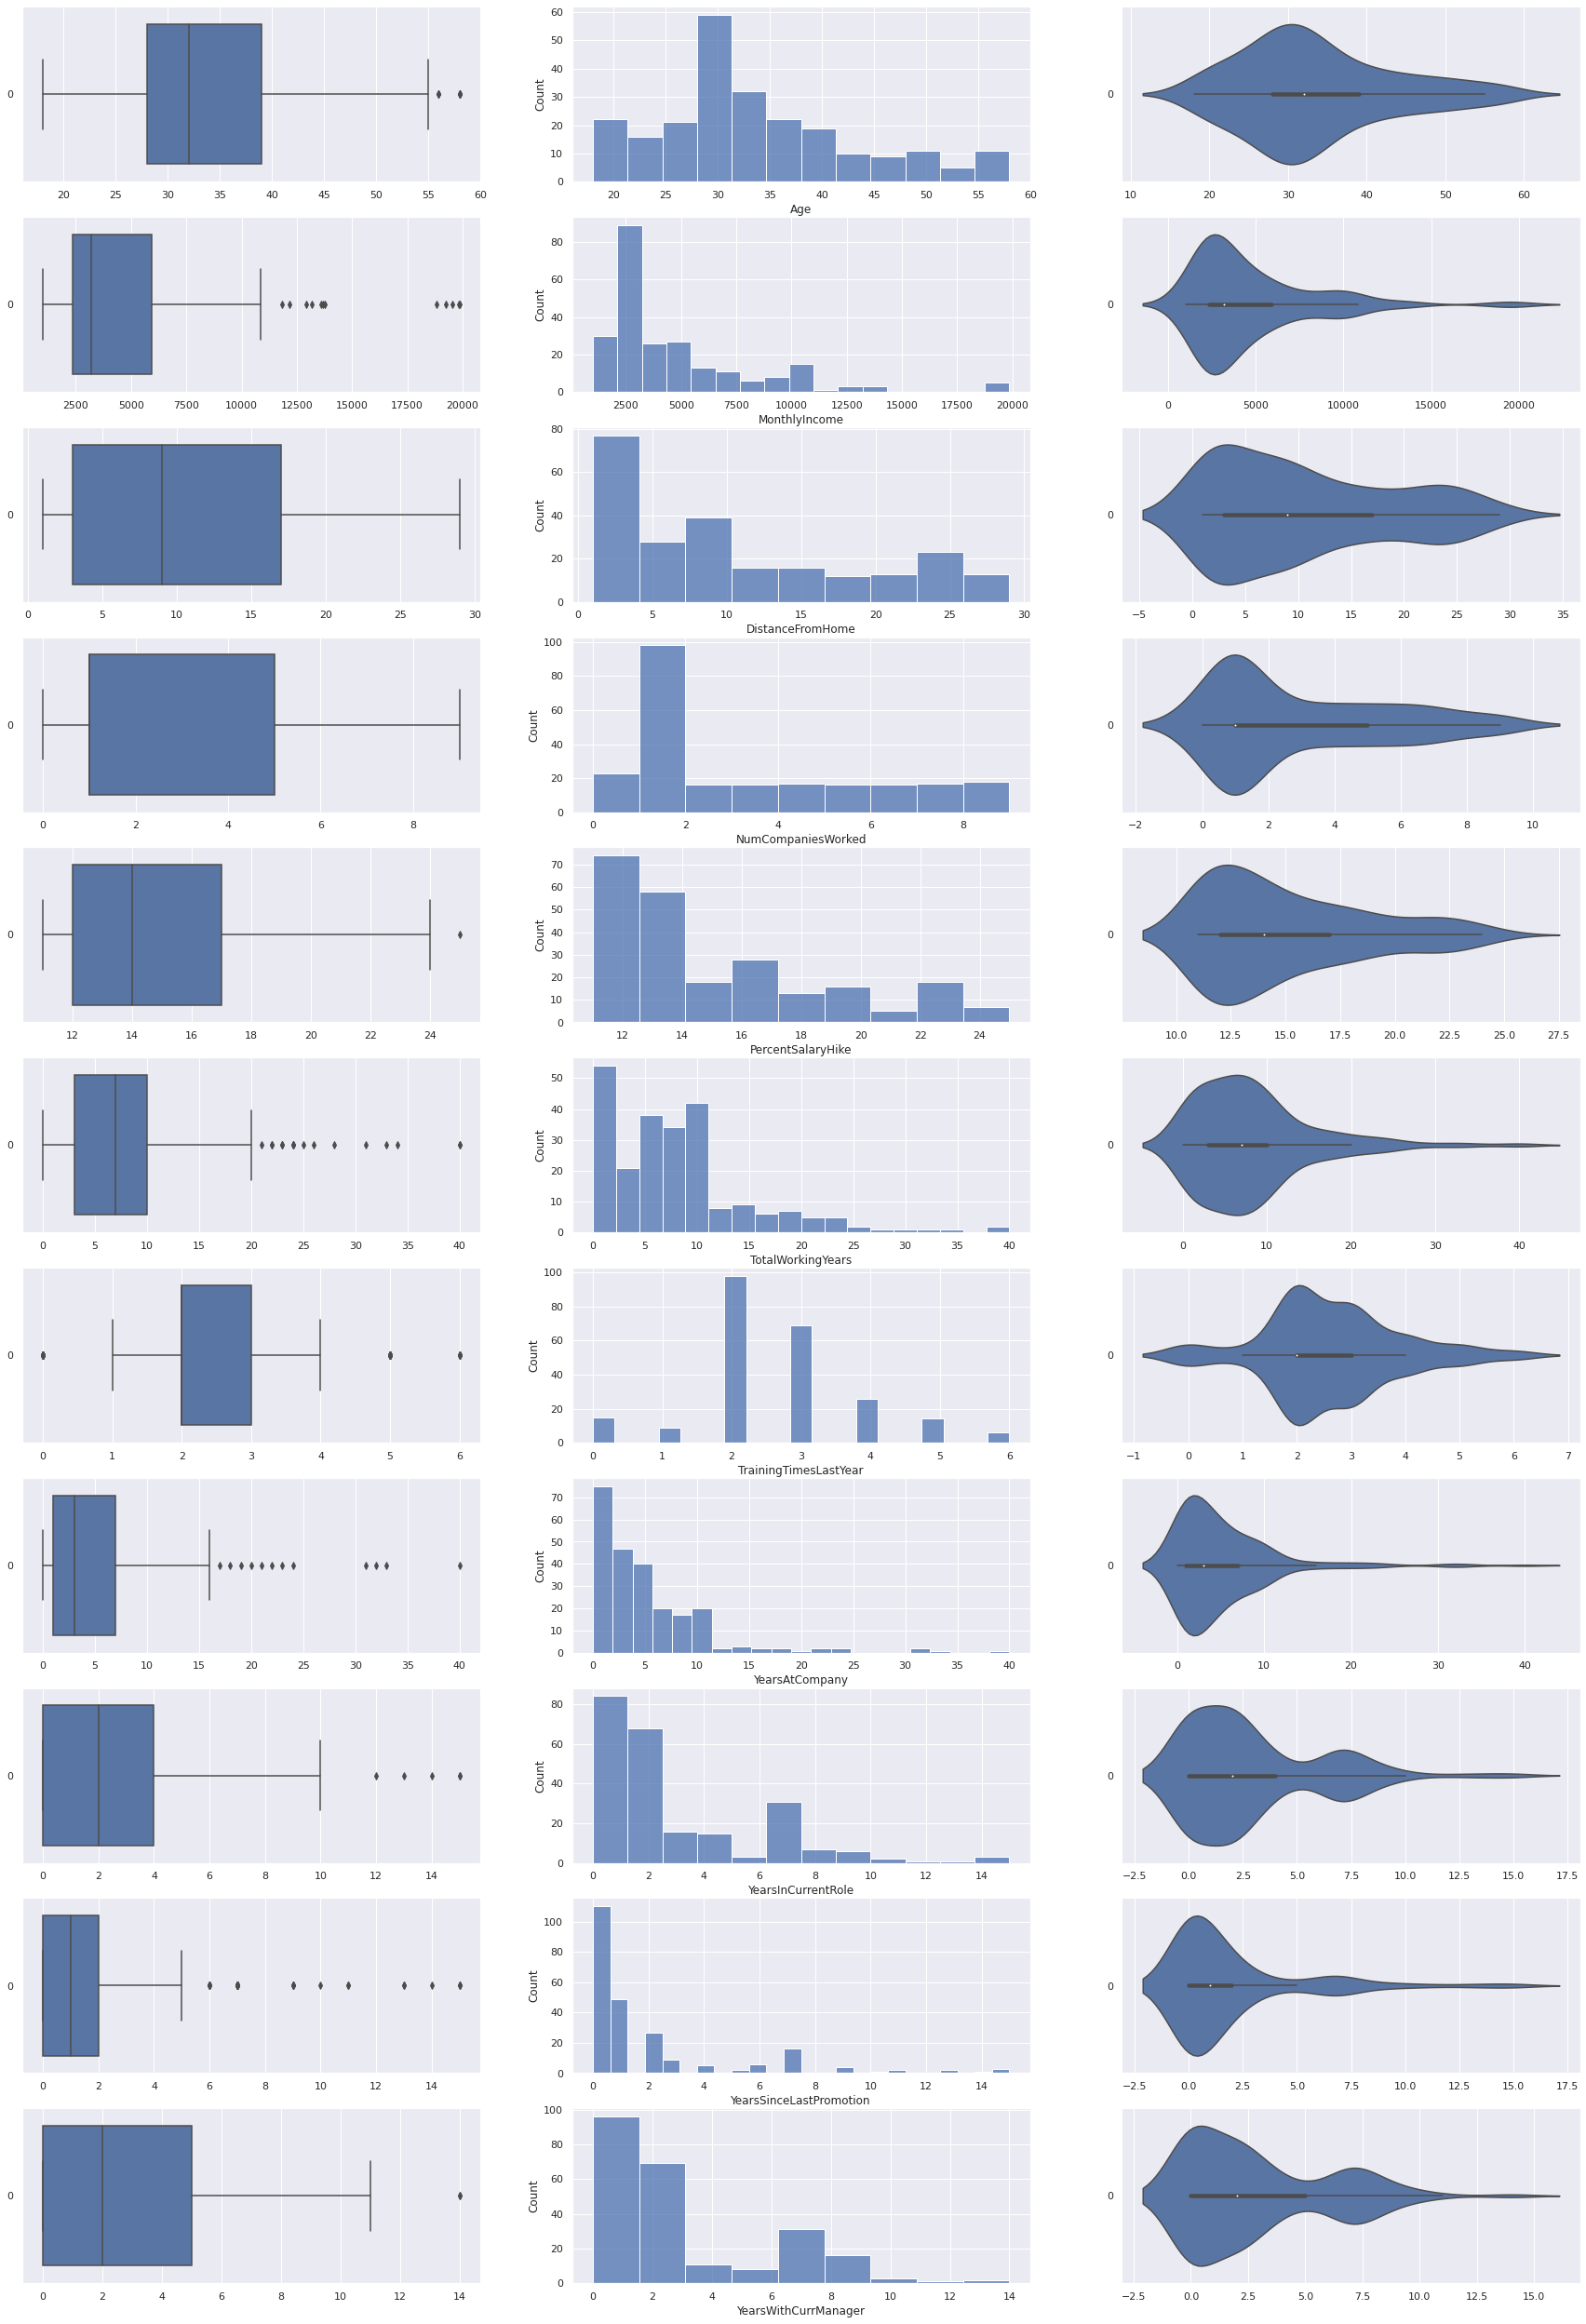

In [43]:
rslt_df = data.loc[data['Attrition'] == "Yes"]
crucial_data = rslt_df[["Age", "MonthlyIncome", "DistanceFromHome",  "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear",
                        "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]]
f, axes = plt.subplots(11, 3, figsize=(30, 45))

count = 0
for var in crucial_data:
    sb.boxplot(data = crucial_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = crucial_data[var], ax = axes[count,1])
    sb.violinplot(data = crucial_data[var], orient = "h", ax = axes[count,2])
    count += 1